In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv(r'C:\Users\PRITAM\Downloads\Sleep_health_and_lifestyle_dataset.csv')
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.shape

(374, 13)

# Data Claning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

The 'Sleep Disorder' column has missing values. These NaN values indicate that participants did not report any sleep disorders. We'll replace NaNs with "None".

In [7]:
df['Sleep Disorder'].fillna('None',inplace=True)

In [8]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [11]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
gender_count = df['Gender'].value_counts()
gender_percentage = df['Gender'].value_counts(normalize=True)

gender_df = pd.DataFrame({
    'Count': gender_count,
    'Proportion': gender_percentage
})
gender_df['Proportion'] = gender_df['Proportion'].apply("{:.1%}".format)

gender_df

,Count,Proportion
Gender,,
Male,189,50.5%
Female,185,49.5%


Both "Male" and "Female" genders have similar counts, with Male at 50.5% and Female at 49.5%. This indicates a relatively balanced distribution between the two genders.

In [13]:
df['Age'].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
      dtype=int64)

In [14]:
df['Age'].describe().round(1)

count    374.0
mean      42.2
std        8.7
min       27.0
25%       35.2
50%       43.0
75%       50.0
max       59.0
Name: Age, dtype: float64

There are 374 participants in the dataset, with ages ranging from 27 to 59 years. The average age is 42.2 years, with a standard deviation of 8.7 years. The youngest participant is 27 years old, while the oldest is 59 years.

In [15]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [16]:
occupation_count = df['Occupation'].value_counts().reset_index()

occupation_count

,Occupation,count
0,Nurse,73
1,Doctor,71
2,Engineer,63
3,Lawyer,47
4,Teacher,40
5,Accountant,37
6,Salesperson,32
7,Software Engineer,4
8,Scientist,4
9,Sales Representative,2


In [52]:
df['Sleep Duration'].describe().round(1)

count    374.0
mean       7.1
std        0.8
min        5.8
25%        6.4
50%        7.2
75%        7.8
max        8.5
Name: Sleep Duration, dtype: float64

Participants reported an average sleep duration of 7.1 hours, with most sleeping between 6.4 and 7.8 hours.

In [18]:
df['Quality of Sleep'].unique()

array([6, 4, 7, 5, 8, 9], dtype=int64)

In [19]:
quality_of_sleep_count = df['Quality of Sleep'].value_counts().reset_index()
quality_of_sleep_count


,Quality of Sleep,count
0,8,109
1,6,105
2,7,77
3,9,71
4,5,7
5,4,5


 Excellent (8 hours): 109 participants
 
Good (7 hours): 77 participants\

Very good (9 hours): 71 participants

Fair (6 hours): 105 participants

Poor (5 hours): 7 participants

Very poor (4 hours): 5 participants

In [28]:
df['Physical Activity Level'].unique()

array([42, 60, 30, 40, 75, 35, 45, 50, 32, 70, 80, 55, 90, 47, 65, 85],
      dtype=int64)

In [29]:
df['Physical Activity Level'].describe().round(2)

count    374.00
mean      59.17
std       20.83
min       30.00
25%       45.00
50%       60.00
75%       75.00
max       90.00
Name: Physical Activity Level, dtype: float64

The average physical activity level reported by participants is 59, with a standard deviation of approximately 20.83, indicating some variability in reported activity levels.

In [21]:
df['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5], dtype=int64)

In [22]:
df['Stress Level'].describe().round(2)

count    374.00
mean       5.39
std        1.77
min        3.00
25%        4.00
50%        5.00
75%        7.00
max        8.00
Name: Stress Level, dtype: float64

The lowest level of stress reported among participants is 3 and the highest reported stress level is 8. On average, participants reported a stress level of approximately 5.39.

In [44]:
stress_level_counts=df['Stress Level'].value_counts().reset_index()

stress_level_counts

,Stress Level,count
0,3,71
1,8,70
2,4,70
3,5,67
4,7,50
5,6,46


In [23]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

We will replace the value 'Normal' with 'Normal Weight' in the 'BMI' column. This is done to clarify the representation, as both 'Normal' and 'Normal Weight' essentially convey the same meaning.

In [24]:
df['BMI Category'] = df['BMI Category'].replace({'Normal': 'Normal Weight'})

In [25]:
bmi_category_count=df['BMI Category'].value_counts()
bmi_category_percentage = df['BMI Category'].value_counts(normalize=True)

bmi_df = pd.DataFrame({
    'Count': bmi_category_count,
    'Proportion': bmi_category_percentage
})
bmi_df['Proportion'] = bmi_df['Proportion'].apply("{:.1%}".format)

bmi_df

,Count,Proportion
BMI Category,,
Normal Weight,216,57.8%
Overweight,148,39.6%
Obese,10,2.7%


Normal Weight: 216 participants (57.8%)

Overweight: 148 participants (39.6%)

Obese: 10 participants (2.7%)


In [27]:
df['Daily Steps'].describe().round(2)

count      374.00
mean      6816.84
std       1617.92
min       3000.00
25%       5600.00
50%       7000.00
75%       8000.00
max      10000.00
Name: Daily Steps, dtype: float64

Participants took an average of 6,816.84 steps per day, with a range from 3,000 to 10,000 steps.

In [30]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [31]:
sleep_disorder_counts = df['Sleep Disorder'].value_counts()
sleep_disorder_percentages = df['Sleep Disorder'].value_counts(normalize=True)

sleep_disorder_df = pd.DataFrame({
    'Count': sleep_disorder_counts,
    'Proportion': sleep_disorder_percentages
})

sleep_disorder_df['Proportion'] = sleep_disorder_df['Proportion'].apply("{:.1%}".format)

sleep_disorder_df

,Count,Proportion
Sleep Disorder,,
None,219,58.6%
Sleep Apnea,78,20.9%
Insomnia,77,20.6%


In the dataset, the majority of participants (58.6%) reported no sleep disorder, while approximately 20.9% and 20.6% reported sleep apnea and insomnia, respectively

# Visualization

In [34]:
my_palette = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

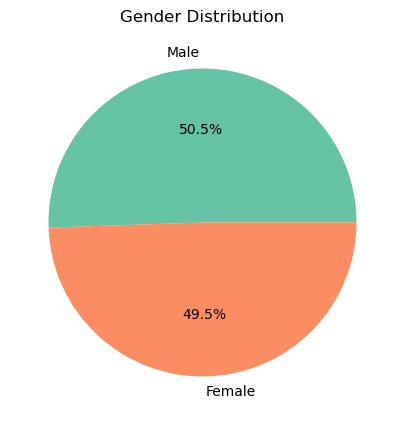

In [32]:
plt.figure(figsize=(5, 5))
plt.pie(gender_count, labels=df['Gender'].unique(), autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Gender Distribution')

plt.show()

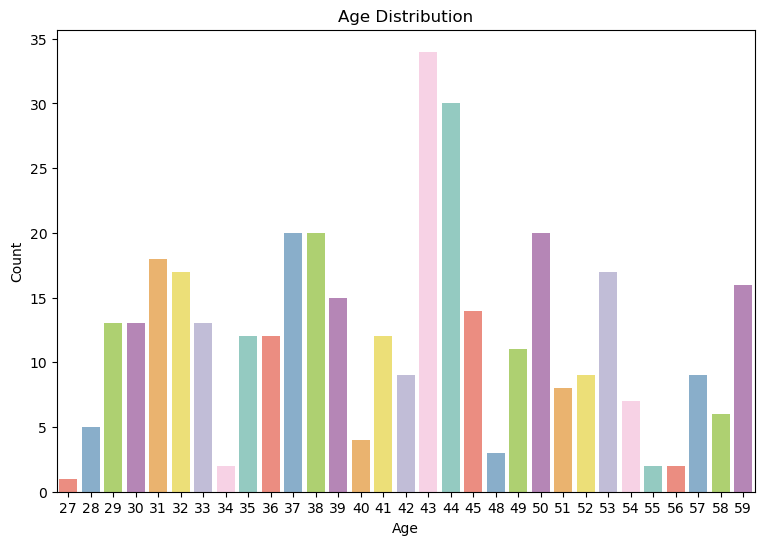

In [35]:
plt.figure(figsize=(9, 6))
sns.countplot(data = df, x='Age', palette=my_palette)
plt.ylabel("Count")
plt.title('Age Distribution')
plt.show()

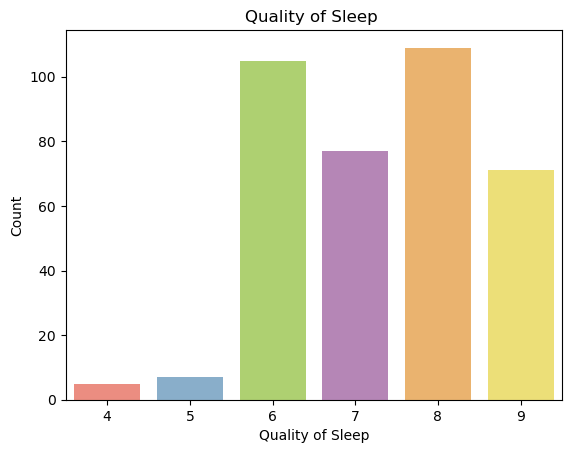

In [36]:
sns.countplot(data = df, x='Quality of Sleep', palette=my_palette)
plt.ylabel("Count")
plt.title('Quality of Sleep ')
plt.show()

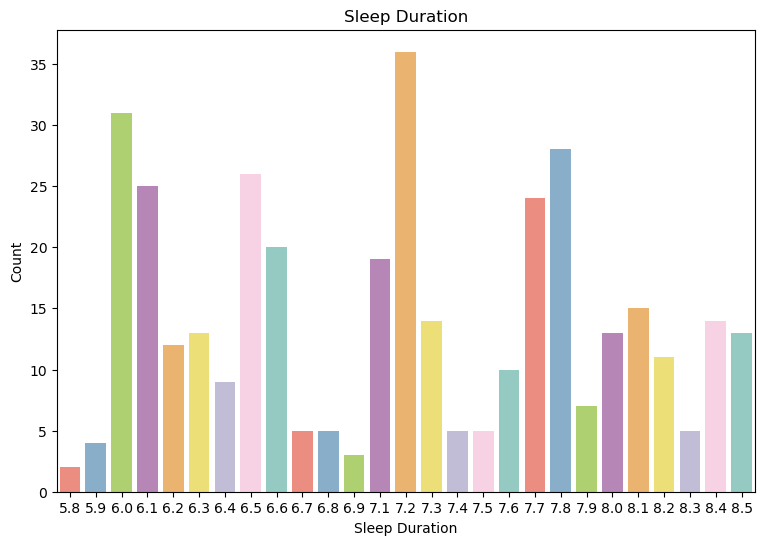

In [37]:
plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='Sleep Duration', palette=my_palette)
plt.ylabel("Count")
plt.title('Sleep Duration')
plt.show()


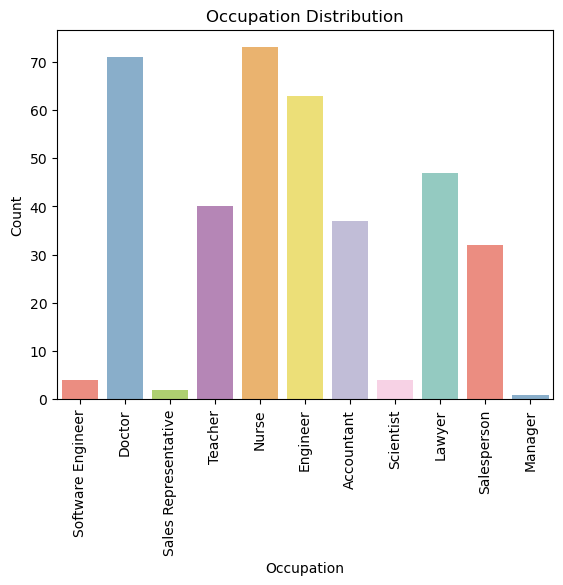

In [41]:
sns.countplot(data = df, x = 'Occupation', palette=my_palette)
plt.ylabel("Count")
plt.title(f'Occupation Distribution')
plt.xticks(rotation=90)
plt.show()

In [45]:
stress_level_counts

,Stress Level,count
0,3,71
1,8,70
2,4,70
3,5,67
4,7,50
5,6,46


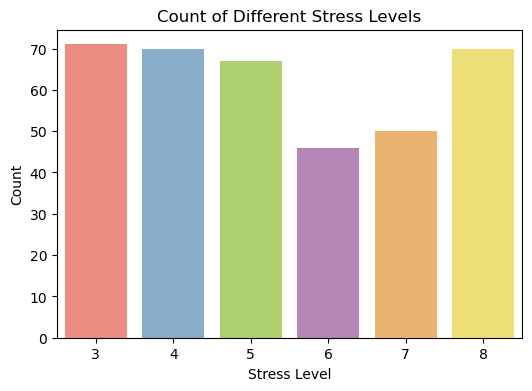

In [46]:
plt.figure(figsize=(6, 4))
sns.barplot(data=stress_level_counts, x='Stress Level', y='count', palette=my_palette)
plt.title('Count of Different Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

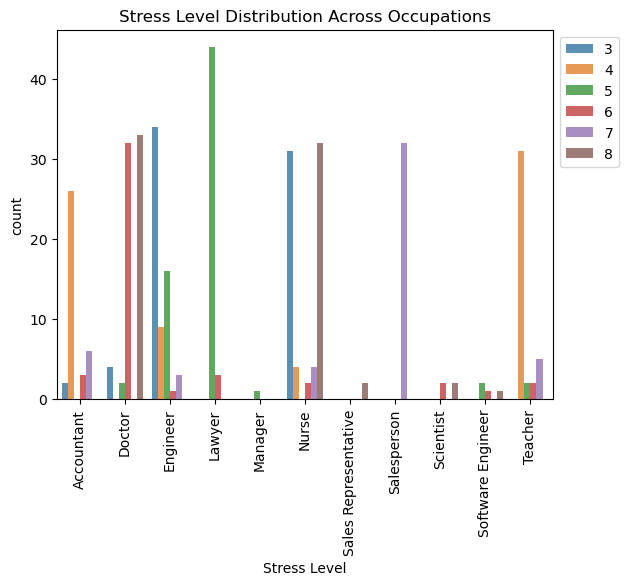

In [47]:
# Grouping the DataFrame by 'Occupation' and 'Stress Level'
# then counting the occurrences of each stress level within each occupation. 

occupation_stress = df.groupby('Occupation')['Stress Level'].value_counts().reset_index()

sns.barplot(data=occupation_stress,x='Occupation',y='count',hue='Stress Level', alpha=0.8,width=0.8) 
plt.title('Stress Level Distribution Across Occupations')
plt.xlabel('Stress Level')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.show()


In [53]:
# Counting BMI categories for each occupation.
occupation_bmi = df.groupby('Occupation')['BMI Category'].value_counts().reset_index()

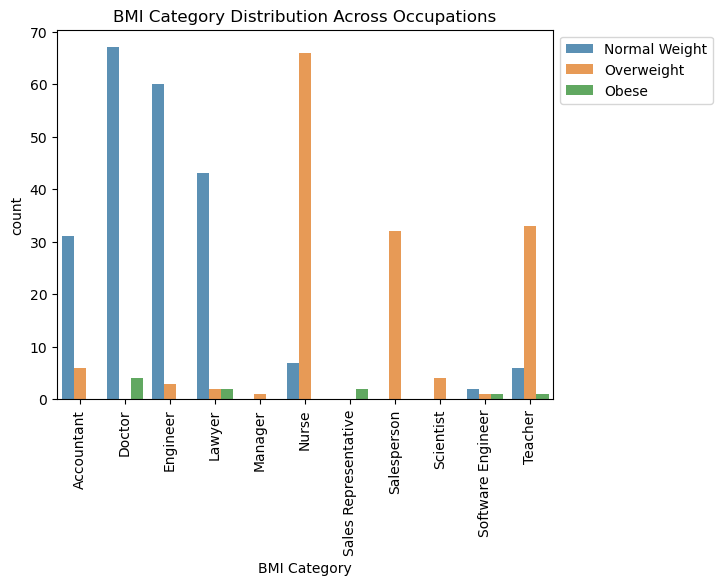

In [54]:
sns.barplot(data=occupation_bmi,x='Occupation',y='count',hue='BMI Category', alpha=0.8,width=0.8) 
plt.title('BMI Category Distribution Across Occupations')
plt.xlabel('BMI Category')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.show()


In [48]:
sleep_group = df.groupby(['Sleep Duration', 'Quality of Sleep'])
summary_stats = sleep_group.size().reset_index(name='count')

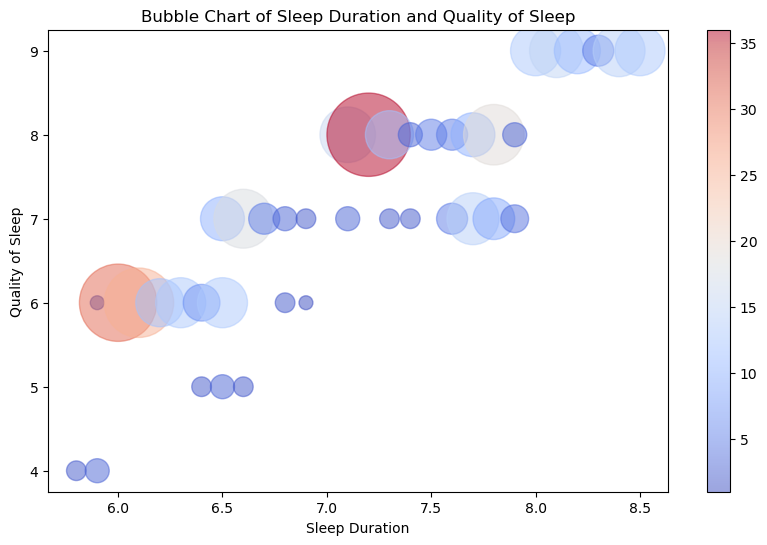

In [49]:
plt.figure(figsize=(10, 6))
bubble = plt.scatter(summary_stats['Sleep Duration'], summary_stats['Quality of Sleep'], s=summary_stats['count']*100, alpha=0.5, c=summary_stats['count'], cmap='coolwarm')
plt.colorbar(bubble)
plt.title('Bubble Chart of Sleep Duration and Quality of Sleep')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.show()